
## Columns

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

### Inspiration
Can you accurately predict insurance costs?

#### BMI
- For most adults, an ideal BMI is in the 18.5 to 24.9 range. For children and young people aged 2 to 18, the BMI calculation takes into account age and gender as well as height and weight. If your BMI is: below 18.5 – you're in the underweight range.

- Body Mass Index is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9.

In [1]:
import pyforest

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

<IPython.core.display.Javascript object>

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
def num_plot(x,c='g'):
    plt.figure(figsize=(16,8))
    sns.distplot(df[x],color=c)
    plt.show()
    print(10*'----',x,10*'----')
    print('MIN: ',df[x].min())
    print('MAX: ',df[x].max())
    print('MEAN:',df[x].mean())
    
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\prasa\Anaconda3\envs\jp\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

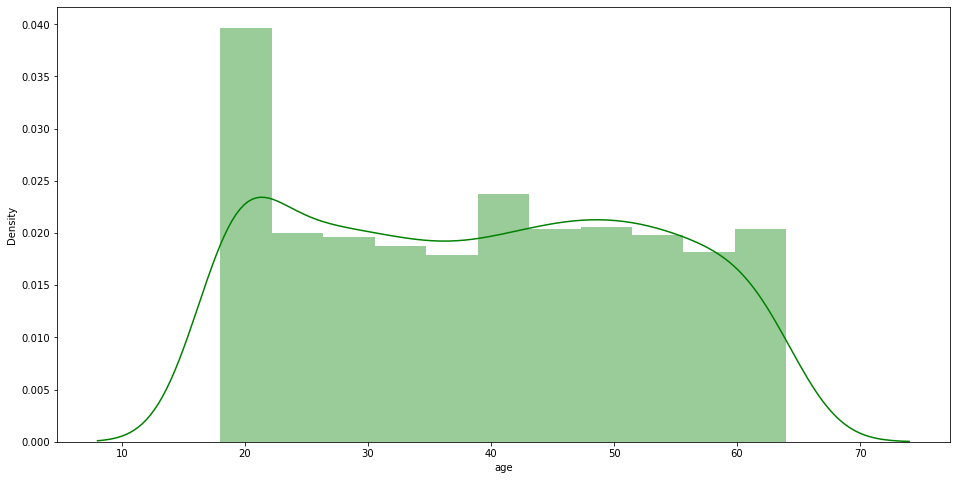

---------------------------------------- age ----------------------------------------
MIN:  18
MAX:  64
MEAN: 39.20702541106129


In [7]:
num_plot('age')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\prasa\Anaconda3\envs\jp\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

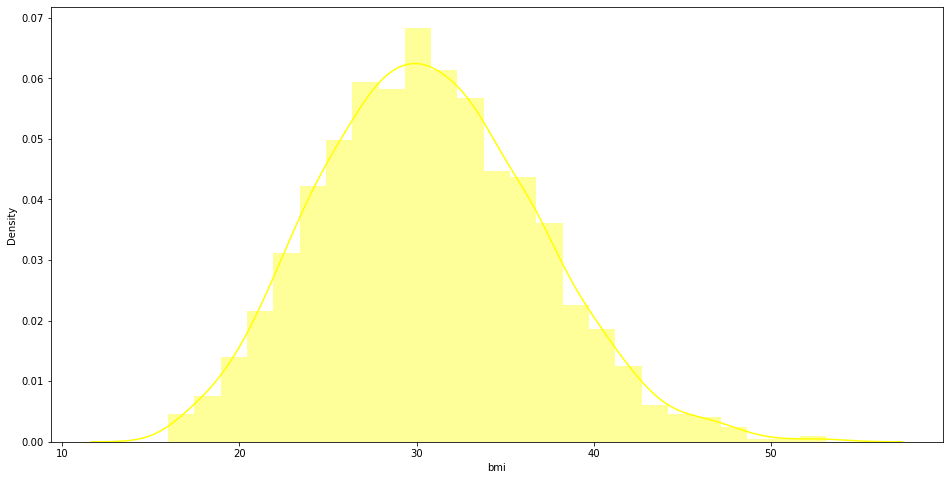

---------------------------------------- bmi ----------------------------------------
MIN:  15.96
MAX:  53.13
MEAN: 30.66339686098655


In [8]:
num_plot('bmi','yellow')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\prasa\Anaconda3\envs\jp\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

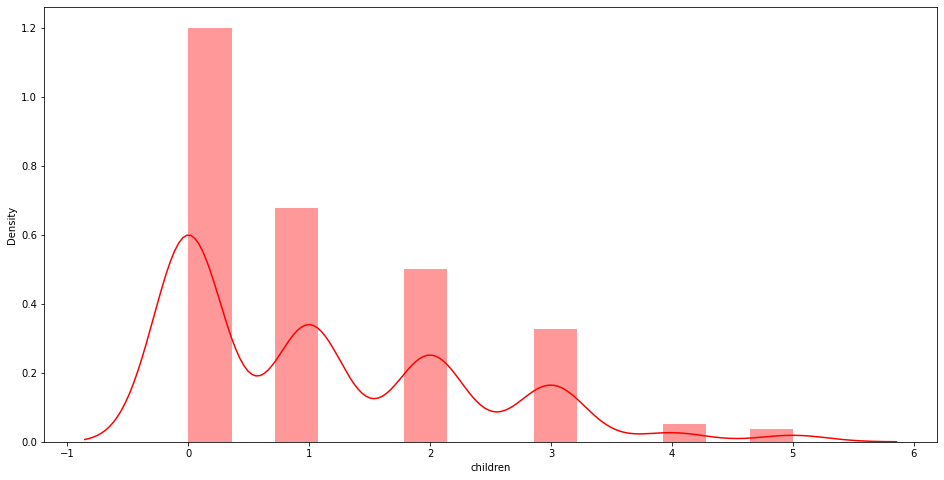

---------------------------------------- children ----------------------------------------
MIN:  0
MAX:  5
MEAN: 1.0949177877429


In [9]:
num_plot('children','red')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\prasa\Anaconda3\envs\jp\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

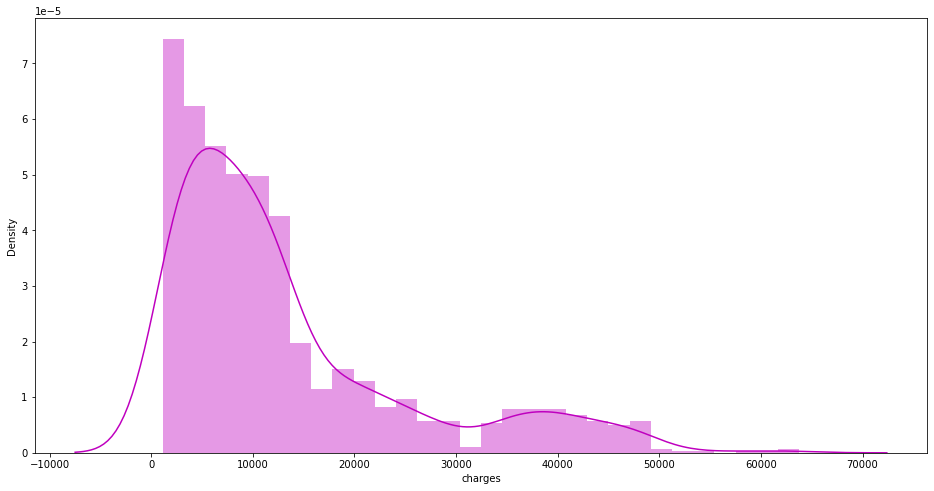

---------------------------------------- charges ----------------------------------------
MIN:  1121.8739
MAX:  63770.42801
MEAN: 13270.422265141257


In [10]:
num_plot('charges',c='m')

In [11]:
def cat_plot(x):
    plt.figure(figsize=(16,8))
    sns.countplot(df[x])
    plt.show()
    print(df[x].value_counts(normalize=True))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\prasa\Anaconda3\envs\jp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

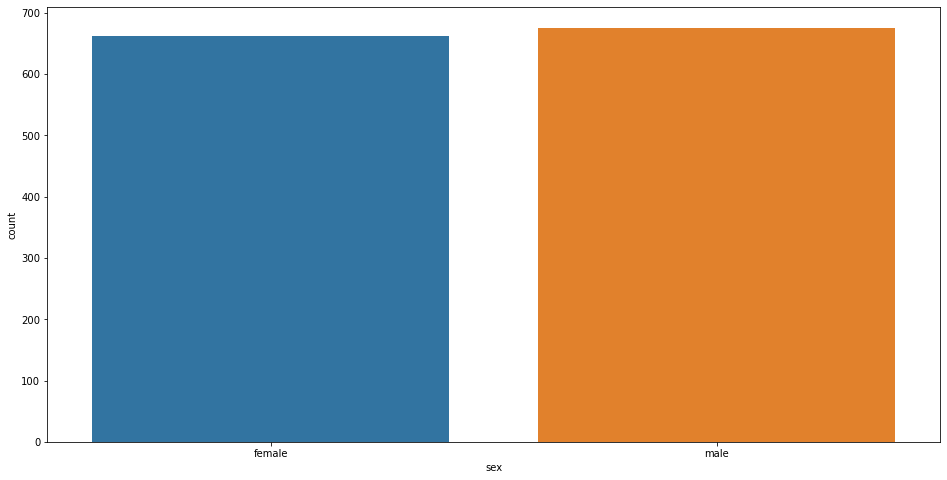

male      0.505232
female    0.494768
Name: sex, dtype: float64


In [12]:
cat_plot('sex')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\prasa\Anaconda3\envs\jp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

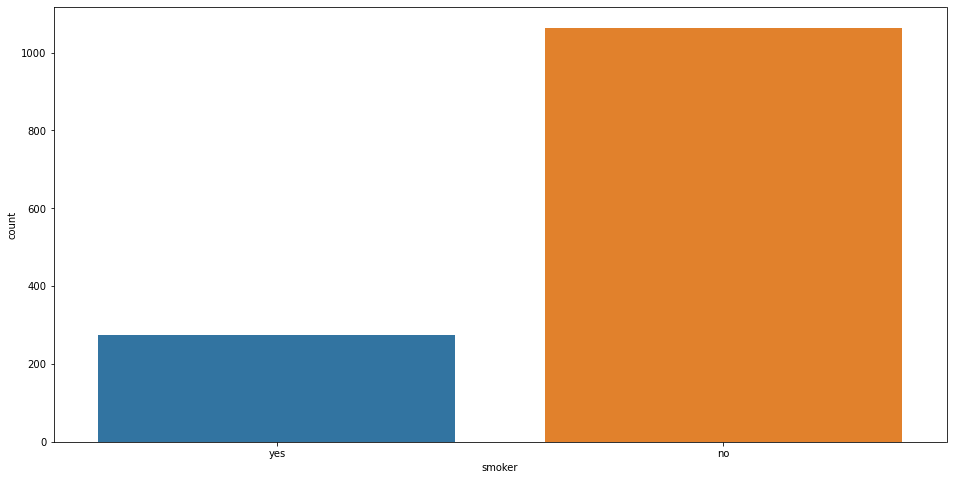

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


In [13]:
cat_plot('smoker')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\prasa\Anaconda3\envs\jp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

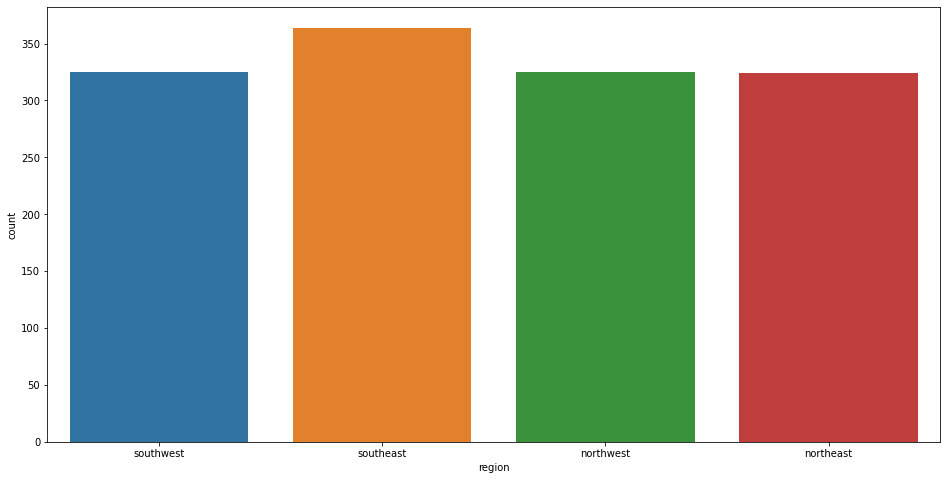

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


In [14]:
cat_plot('region')

# Ideal BMI (18-25)

In [15]:
ideal_bm = df[(df['bmi']>=18) & (df['bmi']<=25)]
ideal_bm

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
26,63,female,23.085,0,no,northeast,14451.83515
35,19,male,20.425,0,no,northwest,1625.43375
...,...,...,...,...,...,...,...
1304,42,male,24.605,2,yes,northeast,21259.37795
1306,29,female,21.850,0,yes,northeast,16115.30450
1314,30,female,23.655,3,yes,northwest,18765.87545
1316,19,female,20.600,0,no,southwest,1731.67700


# AGE vs CHARGES

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

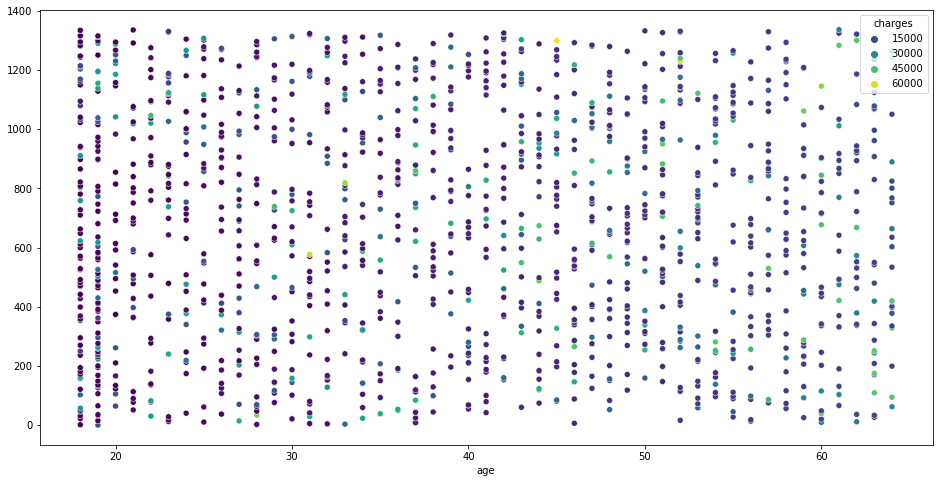

In [16]:
plt.figure(figsize=(16,8))
sns.scatterplot(y=np.arange(len(df)) ,x=df['age'],hue=df['charges'],palette='viridis',size_order='big')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

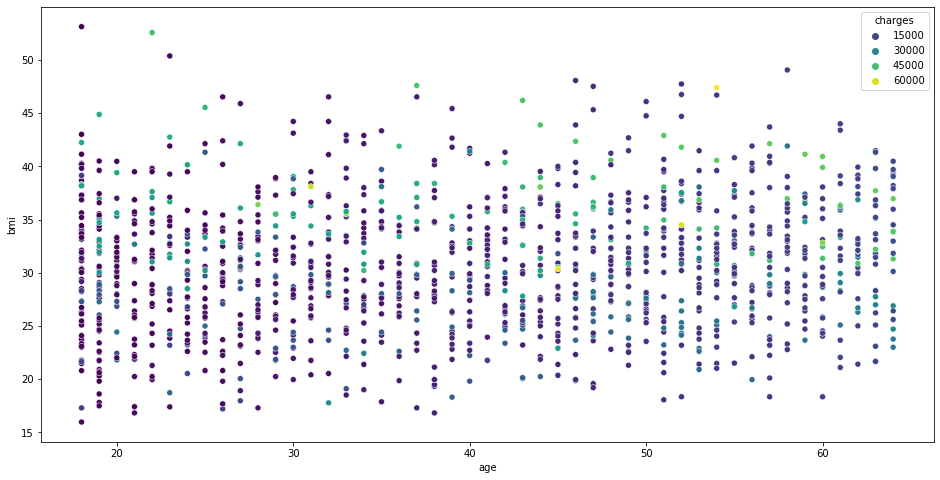

In [17]:
plt.figure(figsize=(16,8))
sns.scatterplot(y=df['bmi'] ,x=df['age'],hue=df['charges'],palette='viridis',size_order='big')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

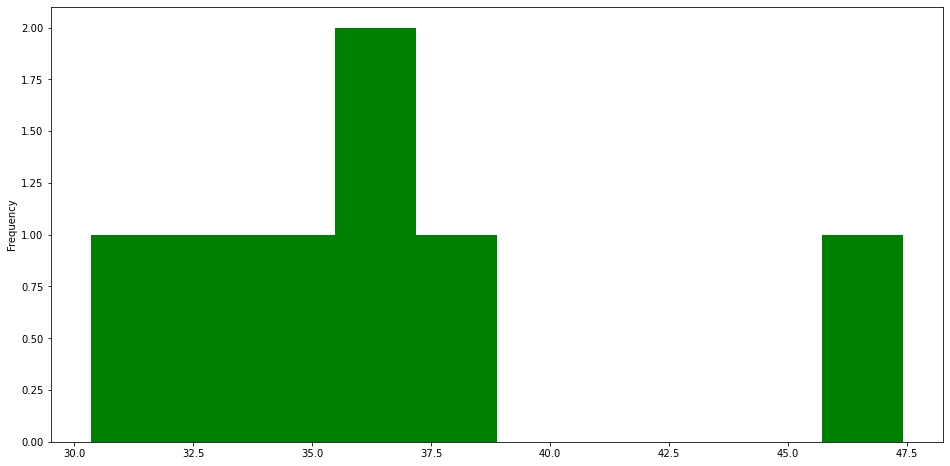

In [18]:
plt.figure(figsize=(16,8))
df[df['charges']>50000]['bmi'].plot(kind='hist',color='g')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

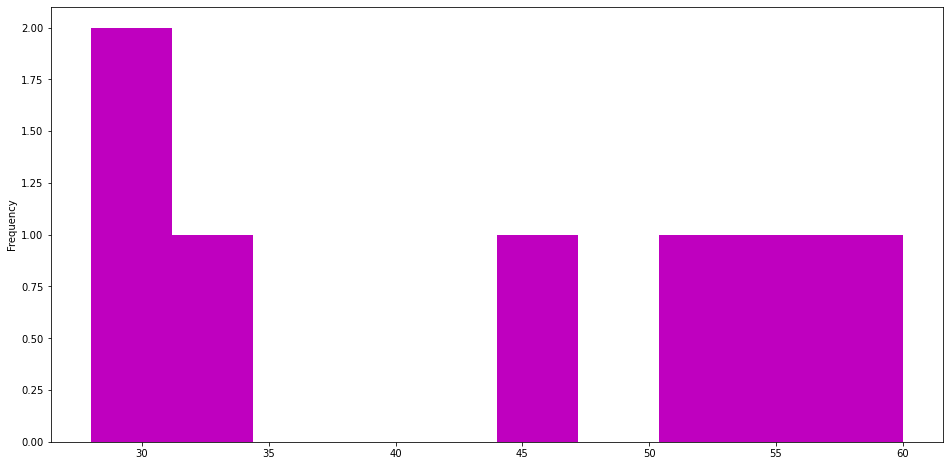

In [19]:
plt.figure(figsize=(16,8))
df[df['charges']>50000]['age'].plot(kind='hist',color='m')
plt.show()

# Converting to Numerical

In [20]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [21]:
gender = pd.get_dummies(df['sex'],drop_first=True,prefix='gender')
gender.head(2)

<IPython.core.display.Javascript object>

,gender_male
0,0
1,1


In [22]:
df = pd.concat([df,gender],axis=1)
df.head()

<IPython.core.display.Javascript object>

,age,sex,bmi,children,smoker,region,charges,gender_male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [23]:
lb_smkr = LabelEncoder()
smoker = lb_smkr.fit_transform(df['smoker'])

In [24]:
df['smoker'] = smoker

In [25]:
lb_smkr.classes_

array(['no', 'yes'], dtype=object)

In [26]:
lb_region = LabelEncoder()
region = lb_region.fit_transform(df['region'])

In [27]:
df['region'] = region

In [28]:
lb_region.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender_male
0,19,female,27.900,0,1,3,16884.92400,0
1,18,male,33.770,1,0,2,1725.55230,1
2,28,male,33.000,3,0,2,4449.46200,1
3,33,male,22.705,0,0,1,21984.47061,1
4,32,male,28.880,0,0,1,3866.85520,1


In [30]:
df.drop('sex',axis=1,inplace=True)

In [31]:
df.head()

,age,bmi,children,smoker,region,charges,gender_male
0,19,27.900,0,1,3,16884.92400,0
1,18,33.770,1,0,2,1725.55230,1
2,28,33.000,3,0,2,4449.46200,1
3,33,22.705,0,0,1,21984.47061,1
4,32,28.880,0,0,1,3866.85520,1


In [32]:
x = df.drop('charges',axis=1).values
y = df['charges'].values

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split

In [34]:
std = StandardScaler()
x = std.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=89)

In [36]:
x_train.shape

(1070, 6)

In [37]:
y_train.shape

(1070,)

In [38]:
x_test.shape

(268, 6)

In [39]:
y_test.shape

(268,)

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [41]:
mse = mean_squared_error(y_test,y_pred)
mse

38497798.37035018

In [42]:
np.sqrt(mse)

<IPython.core.display.Javascript object>

6204.659408086006

In [43]:
r2_score(y_test,y_pred)

0.7824541911545069

In [44]:
df.head()

,age,bmi,children,smoker,region,charges,gender_male
0,19,27.900,0,1,3,16884.92400,0
1,18,33.770,1,0,2,1725.55230,1
2,28,33.000,3,0,2,4449.46200,1
3,33,22.705,0,0,1,21984.47061,1
4,32,28.880,0,0,1,3866.85520,1


In [49]:
pt = [[32,28.88,0,0,1,1]]
pt = std.transform(pt)

In [50]:
lr.predict(pt)

array([5564.18515006])